# CS-C3250 - Data Science Project: Predicting Housing Prices in One Year
__Sponsored by OP bank__

## Exploratory Data Analysis

Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
ls

bruce_eda-copy1.ipynb  dean_eda.ipynb
bruce_eda.ipynb        ray_eda.ipynb


Reading the data.

In [3]:
df = pd.read_csv("../data/quarterly_data.csv", encoding = 'unicode_escape')
df

,Postal code,Building type,2010Q1 Price per square meter (EUR/m2),2010Q2 Price per square meter (EUR/m2),2010Q3 Price per square meter (EUR/m2),2010Q4 Price per square meter (EUR/m2),2011Q1 Price per square meter (EUR/m2),2011Q2 Price per square meter (EUR/m2),2011Q3 Price per square meter (EUR/m2),2011Q4 Price per square meter (EUR/m2),...,2019Q1 Price per square meter (EUR/m2),2019Q2 Price per square meter (EUR/m2),2019Q3 Price per square meter (EUR/m2),2019Q4 Price per square meter (EUR/m2),2020Q1 Price per square meter (EUR/m2),2020Q2 Price per square meter (EUR/m2),2020Q3 Price per square meter (EUR/m2),2020Q4 Price per square meter (EUR/m2),2021Q1* Price per square meter (EUR/m2),2021Q2* Price per square meter (EUR/m2)
0,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, one-room flat",5458,5347,5826,5566,5545,5812,5909,5856,...,7755,8332,8130,8068,7802,8543,9170,7517,8872,8596
1,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, two-room flat",5164,5021,5081,5006,5713,5866,5552,5614,...,6914,7694,6901,7435,7573,7398,7868,7700,7829,7974
2,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, three-room flat+",4944,5396,4828,5394,5571,5709,5450,5010,...,6883,6846,7379,6728,7205,6678,7178,7405,8053,8174
3,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Blocks of flats total,5168,5219,5181,5269,5632,5807,5630,5511,...,7043,7478,7476,7345,7460,7275,8058,7540,8188,8188
4,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Terraced houses total,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,99980 Utsjoki Keskus (Utsjoki ),"Blocks of flats, two-room flat",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
10070,99980 Utsjoki Keskus (Utsjoki ),"Blocks of flats, three-room flat+",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
10071,99980 Utsjoki Keskus (Utsjoki ),Blocks of flats total,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
10072,99980 Utsjoki Keskus (Utsjoki ),Terraced houses total,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


Transform location description to only postal code

In [4]:
codes = df.iloc[:,0].apply(lambda x: x[:5])

Getting indicies and column names

In [5]:
indices = pd.MultiIndex.from_arrays((codes, df.iloc[:,1]))
columns = df.iloc[:,2:].columns
df1 = pd.DataFrame(df.iloc[:,2:].to_numpy(), index=indices, columns=columns)

Force cell values to numeric type, in the process turning non-numeric cells ("..") to NaN values.

In [6]:
df1 = df1.apply(pd.to_numeric, errors="coerce")
df1.head()

2010Q1 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5458.0   
            Blocks of flats, two-room flat                                     5164.0   
            Blocks of flats, three-room flat+                                  4944.0   
            Blocks of flats total                                              5168.0   
            Terraced houses total                                                 NaN   

                                               2010Q2 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5347.0   
            Blocks of flats, two-room flat                                     5021.0   
            Blocks of flats, three-room flat+                                  5396.0   
            Blocks of flats total                                              5219.0   
            Terraced houses total                                                 NaN   

                                               2010Q3 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5826.0   
            Blocks of flats, two-room flat                                     5081.0   
            Blocks of flats, three-room flat+                                  4828.0   
            Blocks of flats total                                              5181.0   
            Terraced houses total                                                 NaN   

                                               2010Q4 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5566.0   
            Blocks of flats, two-room flat                                     5006.0   
            Blocks of flats, three-room flat+                                  5394.0   
            Blocks of flats total                                              5269.0   
            Terraced houses total                                                 NaN   

                                               2011Q1 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5545.0   
            Blocks of flats, two-room flat                                     5713.0   
            Blocks of flats, three-room flat+                                  5571.0   
            Blocks of flats total                                              5632.0   
            Terraced houses total                                                 NaN   

                                               2011Q2 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5812.0   
            Blocks of flats, two-room flat                                     5866.0   
            Blocks of flats, three-room flat+                                  5709.0   
            Blocks of flats total                                              5807.0   
            Terraced houses total                                                 NaN   

                                               2011Q3 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5909.0   
            Blocks of flats, two-roo

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10074 entries, ('00100', 'Blocks of flats, one-room flat') to ('99980', 'Building types total')
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   2010Q1 Price per square meter (EUR/m2)   1608 non-null   float64
 1   2010Q2 Price per square meter (EUR/m2)   1703 non-null   float64
 2   2010Q3 Price per square meter (EUR/m2)   1637 non-null   float64
 3   2010Q4 Price per square meter (EUR/m2)   1604 non-null   float64
 4   2011Q1 Price per square meter (EUR/m2)   1645 non-null   float64
 5   2011Q2 Price per square meter (EUR/m2)   1691 non-null   float64
 6   2011Q3 Price per square meter (EUR/m2)   1673 non-null   float64
 7   2011Q4 Price per square meter (EUR/m2)   1398 non-null   float64
 8   2012Q1 Price per square meter (EUR/m2)   1557 non-null   float64
 9   2012Q2 Price per square meter (EUR/m2)   1686 

Transposing the data for other needs.

In [8]:
dfT = df1.T
dfT.head()

Postal code                                                     00100  \
Building type                          Blocks of flats, one-room flat   
2010Q1 Price per square meter (EUR/m2)                         5458.0   
2010Q2 Price per square meter (EUR/m2)                         5347.0   
2010Q3 Price per square meter (EUR/m2)                         5826.0   
2010Q4 Price per square meter (EUR/m2)                         5566.0   
2011Q1 Price per square meter (EUR/m2)                         5545.0   

Postal code                                                            \
Building type                          Blocks of flats, two-room flat   
2010Q1 Price per square meter (EUR/m2)                         5164.0   
2010Q2 Price per square meter (EUR/m2)                         5021.0   
2010Q3 Price per square meter (EUR/m2)                         5081.0   
2010Q4 Price per square meter (EUR/m2)                         5006.0   
2011Q1 Price per square meter (EUR/m2)                         5713.0   

Postal code                                                               \
Building type                          Blocks of flats, three-room flat+   
2010Q1 Price per square meter (EUR/m2)                            4944.0   
2010Q2 Price per square meter (EUR/m2)                            5396.0   
2010Q3 Price per square meter (EUR/m2)                            4828.0   
2010Q4 Price per square meter (EUR/m2)                            5394.0   
2011Q1 Price per square meter (EUR/m2)                            5571.0   

Postal code                                                   \
Building type                          Blocks of flats total   
2010Q1 Price per square meter (EUR/m2)                5168.0   
2010Q2 Price per square meter (EUR/m2)                5219.0   
2010Q3 Price per square meter (EUR/m2)                5181.0   
2010Q4 Price per square meter (EUR/m2)                5269.0   
2011Q1 Price per square meter (EUR/m2)                5632.0   

Postal code                                                   \
Building type                          Terraced houses total   
2010Q1 Price per square meter (EUR/m2)                   NaN   
2010Q2 Price per square meter (EUR/m2)                   NaN   
2010Q3 Price per square meter (EUR/m2)                   NaN   
2010Q4 Price per square meter (EUR/m2)                   NaN   
2011Q1 Price per square meter (EUR/m2)                   NaN   

Postal code                                                  \
Building type                          Building types total   
2010Q1 Price per square meter (EUR/m2)               5168.0   
2010Q2 Price per square meter (EUR/m2)               5219.0   
2010Q3 Price per square meter (EUR/m2)               5181.0   
2010Q4 Price per square meter (EUR/m2)               5269.0   
2011Q1 Price per square meter (EUR/m2)               5632.0   

Postal code                                                     00120  \
Building type                          Blocks of flats, one-room flat   
2010Q1 Price per square meter (EUR/m2)                         5515.0   
2010Q2 Price per square meter (EUR/m2)                         5646.0   
2010Q3 Price per square meter (EUR/m2)                         5395.0   
2010Q4 Price per square meter (EUR/m2)                         5613.0   
2011Q1 Price per square meter (EUR/m2)                         5905.0   

Postal code                                                            \
Building type                          Blocks of flats, two-room flat   
2010Q1 Price per square meter (EUR/m2)                         5349.0   
2010Q2 Price per square meter (EUR/m2)                         5355.0   
2010Q3 Price per square meter (EUR/m2)                         5534.0   
2010Q4 Price per square meter (EUR/m2)                         5321.0   
2011Q1 Price per square meter (EUR/m2)                         5528.0   

Postal code                                                               \
Bui

Example analysis: examine the number of NaNs in 'Terraced houses total' category

In [9]:
df1.swaplevel().T["Terraced houses total"].iloc[:,:100].info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 2010Q1 Price per square meter (EUR/m2) to 2021Q2* Price per square meter (EUR/m2)
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   00100   0 non-null      float64
 1   00120   0 non-null      float64
 2   00130   0 non-null      float64
 3   00140   0 non-null      float64
 4   00150   0 non-null      float64
 5   00160   0 non-null      float64
 6   00170   0 non-null      float64
 7   00180   0 non-null      float64
 8   00190   0 non-null      float64
 9   00200   1 non-null      float64
 10  00210   0 non-null      float64
 11  00220   0 non-null      float64
 12  00240   0 non-null      float64
 13  00250   0 non-null      float64
 14  00260   0 non-null      float64
 15  00270   0 non-null      float64
 16  00280   0 non-null      float64
 17  00290   0 non-null      float64
 18  00300   0 non-null      float64
 19  00310   0 non-null      float64
 20  00320   

Plotting!

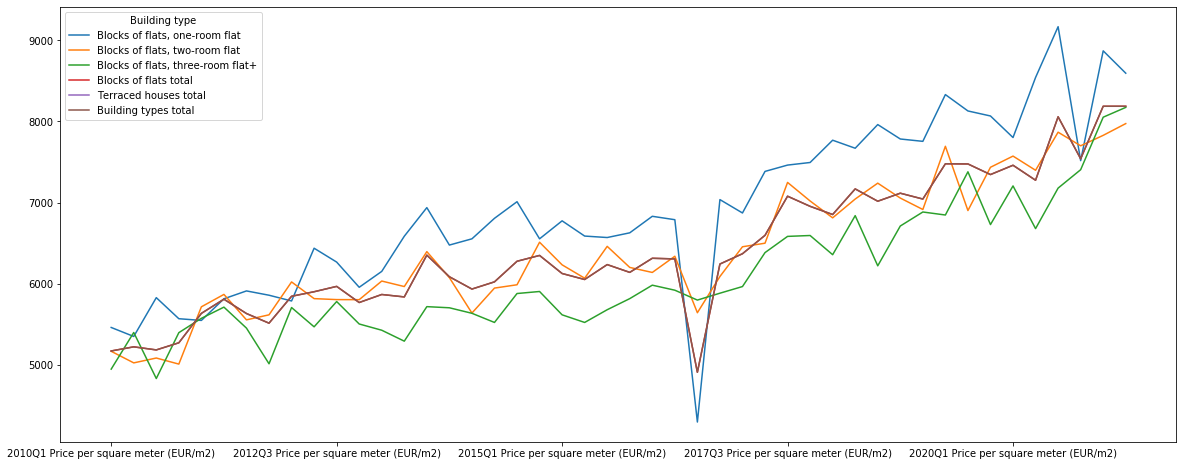

In [10]:
dfT["00100"].plot(figsize=(20,8))

## Handling missing data

Share of empty cells in columns (0.0 no NaN values , 1.0 all are NaN)

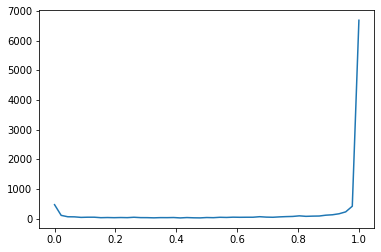

In [11]:
dfT.isnull().mean().value_counts().sort_index().plot()

Amount of columns which contain over 50% no-Nan values. 

In [12]:
len(dfT.columns[dfT.isnull().mean() < 0.5])

1324

Removing columns which contain over 50% Nan-values.

In [13]:
df2 = dfT[dfT.columns[dfT.isnull().mean() < 0.5]]

Filling up Nan values with linear interpolation technique

In [14]:
df3 = df2.interpolate()

## Continuation

In [25]:
df3.index = df3.index.map(lambda x: x[:6])
df3

Postal code                            00100                                 \
Building type Blocks of flats, one-room flat Blocks of flats, two-room flat   
2010Q1                                5458.0                         5164.0   
2010Q2                                5347.0                         5021.0   
2010Q3                                5826.0                         5081.0   
2010Q4                                5566.0                         5006.0   
2011Q1                                5545.0                         5713.0   
2011Q2                                5812.0                         5866.0   
2011Q3                                5909.0                         5552.0   
2011Q4                                5856.0                         5614.0   
2012Q1                                5785.0                         6020.0   
2012Q2                                6436.0                         5814.0   
2012Q3                                6265.0                         5802.0   
2012Q4                                5954.0                         5801.0   
2013Q1                                6150.0                         6031.0   
2013Q2                                6584.0                         5963.0   
2013Q3                                6937.0                         6394.0   
2013Q4                                6475.0                         6073.0   
2014Q1                                6552.0                         5636.0   
2014Q2                                6805.0                         5944.0   
2014Q3                                7010.0                         5985.0   
2014Q4                                6552.0                         6510.0   
2015Q1                                6774.0                         6231.0   
2015Q2                                6586.0                         6066.0   
2015Q3                                6568.0                         6459.0   
2015Q4                                6626.0                         6199.0   
2016Q1                                6830.0                         6137.0   
2016Q2                                6788.0                         6337.0   
2016Q3                                4291.0                         5640.0   
2016Q4                                7036.0                         6087.0   
2017Q1                                6871.0                         6454.0   
2017Q2                                7384.0                         6498.0   
2017Q3                                7462.0                         7248.0   
2017Q4                                7494.0                         7019.0   
2018Q1                                7769.0                         6811.0   
2018Q2                                7670.0                         7043.0   
2018Q3                                7962.0                         7239.0   
2018Q4                                7784.0                         7055.0   
2019Q1                                7755.0                         6914.0   
2019Q2                                8332.0                         7694.0   
2019Q3                                8130.0                         6901.0   
2019Q4                                8068.0                         7435.0   
2020Q1                                7802.0                         7573.0   
2020Q2                                8543.0                         7398.0   
2020Q3                                9170.0                         7868.0   
2020Q4                                7517.0                         7700.0   
2021Q1                                8872.0                         7829.0   
2021Q2                                8596.0                         7974.0   

Postal code                                                            \
Building type Blocks of flats, three-room flat+ Blocks of flats total   
2010Q1                                   4944.0              

FrozenList(['Postal code', 'Building type'])